In [0]:
!pip install scikit-plot

In [0]:
import math 
import pandas as pd
import io
import scikitplot as skplt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA,TruncatedSVD

In [0]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [0]:
import numpy as np
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))
#dataset1=pd.read_csv(io.BytesIO(uploaded['test.csv']))
df = df.dropna(axis = 0, how ='any')
#dataset1 = dataset.dropna(axis = 0, how ='any')
#dataset = dataset.drop(['hash'], axis=1)

In [0]:
df.head()


,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,Subject,Activity
0,-30180,4744,-28368,8,2072,202,1,LAYING
1,-31472,3840,-28412,0,2048,80,1,LAYING
2,-30924,4736,-28640,8,2072,217,1,LAYING
3,-30956,4736,-28368,0,2064,2,1,LAYING
4,-31228,4872,-28384,512,2064,16,1,LAYING


In [0]:
df.shape

(2822, 8)

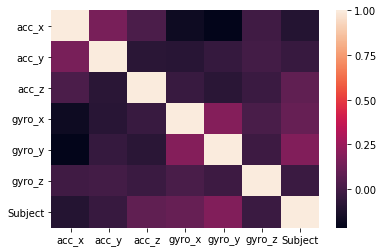

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.heatmap(df.corr())
#sns.heatmap(dataset1.corr())

In [0]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

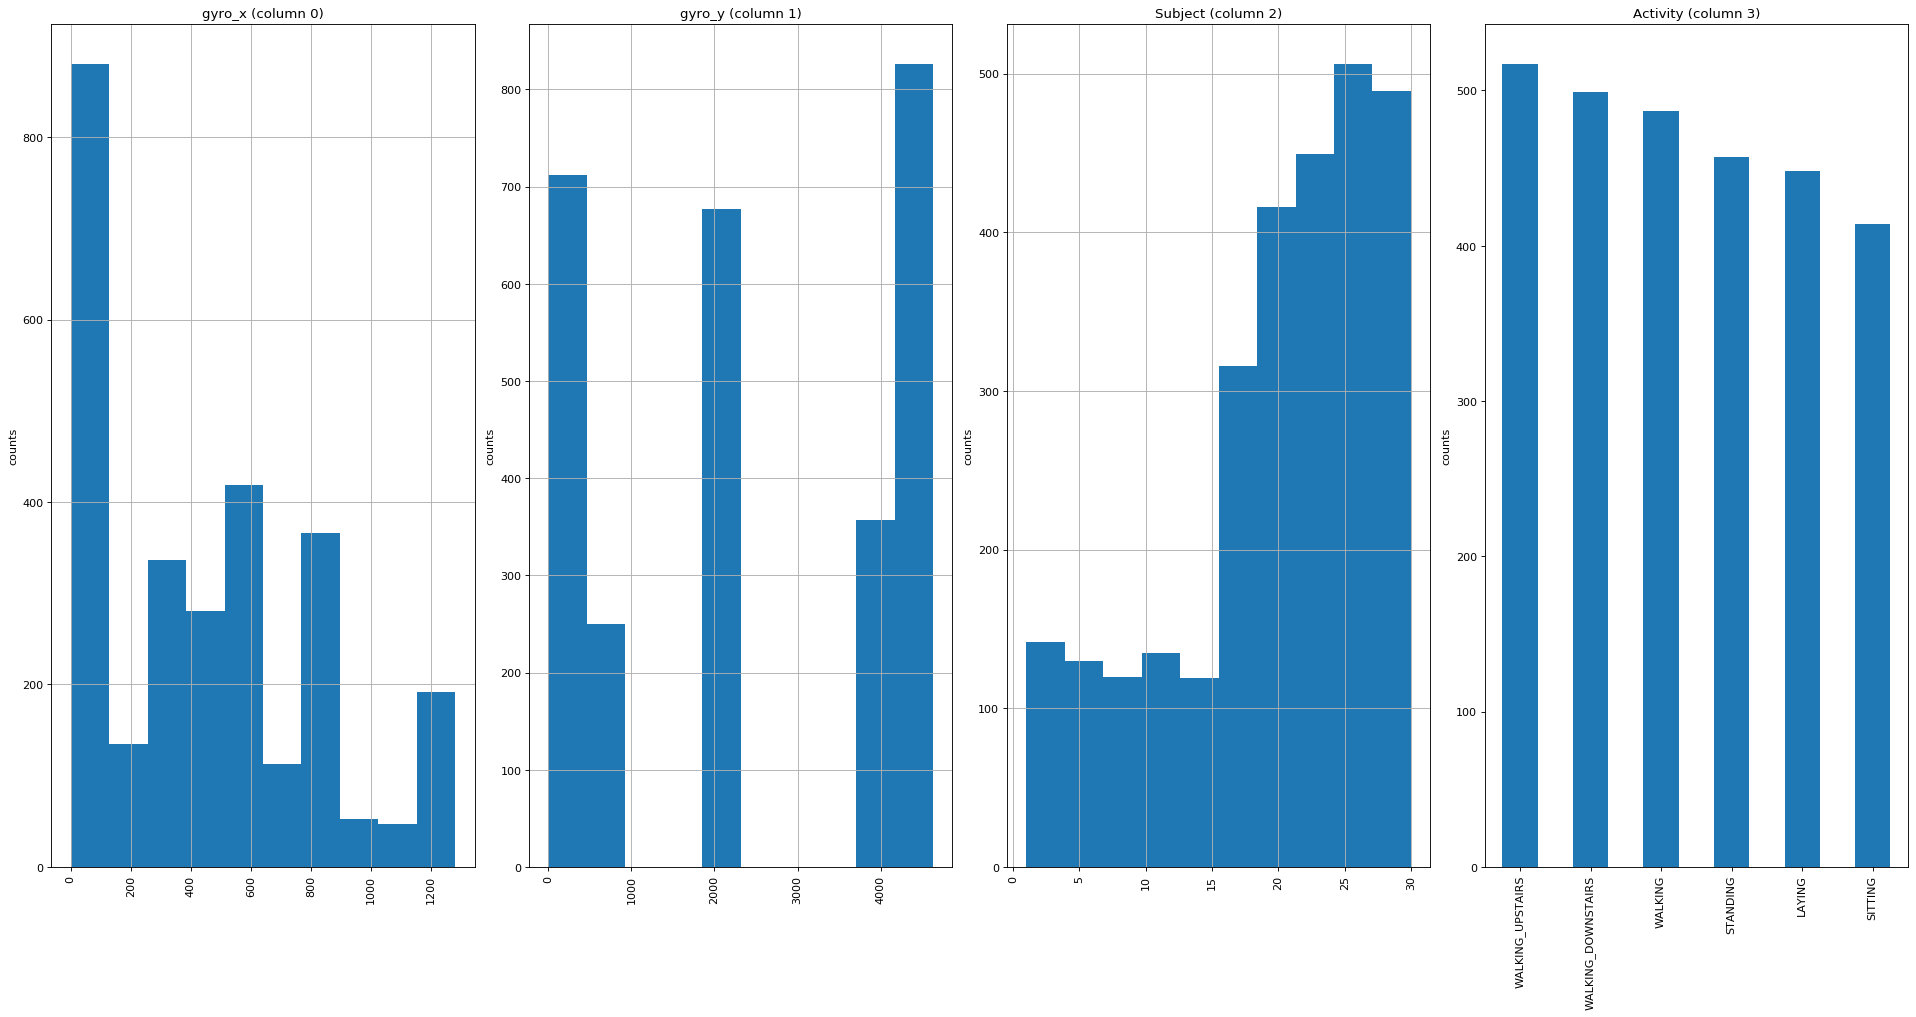

In [0]:
plotPerColumnDistribution(df, 10, 5)
#plotPerColumnDistribution(dataset1, 10, 5)

In [0]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = 'HAR'
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

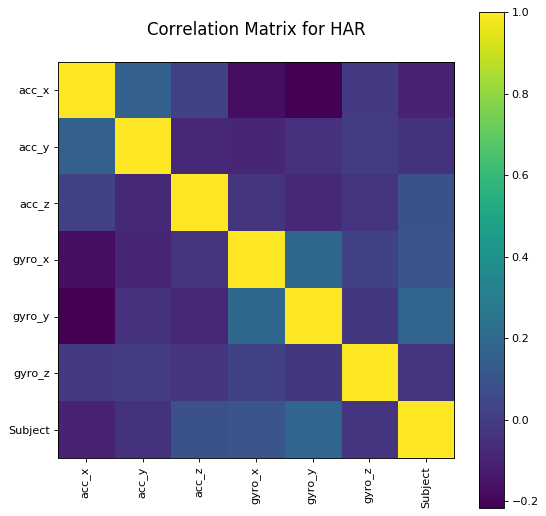

In [0]:
plotCorrelationMatrix(df, 8)
#plotCorrelationMatrix(dataset1, 8)

In [0]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

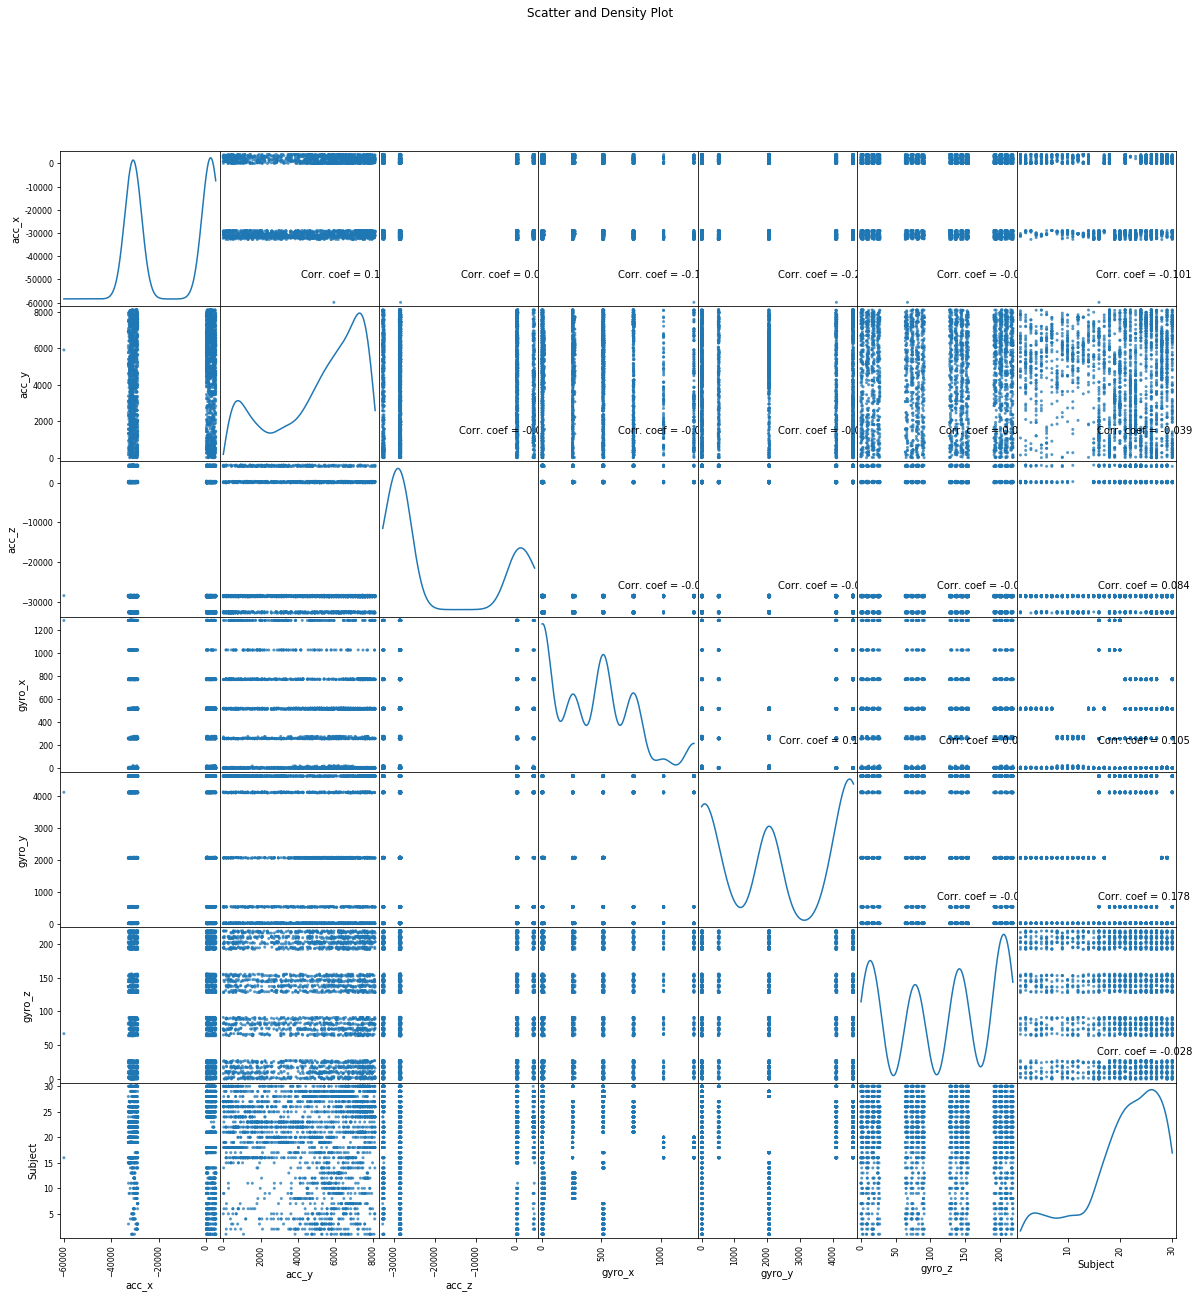

In [0]:
plotScatterMatrix(df, 20, 10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


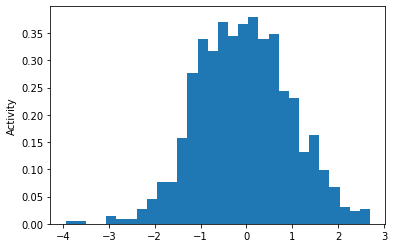

In [0]:
%matplotlib inline
x = np.random.normal(size = 1000)
plt.hist(x, normed=True, bins=30)
plt.ylabel('Activity');

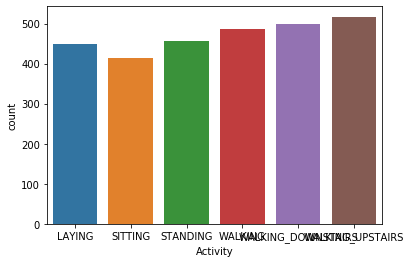

In [0]:
sns.countplot(df["Activity"])
plt.show()

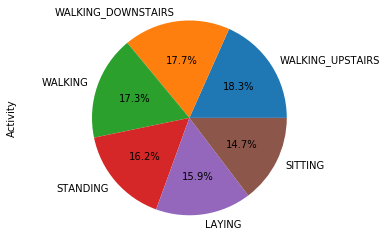

In [0]:
df["Activity"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.axis("equal")
plt.show()

In [0]:
dx = pd.DataFrame(df.drop(['Activity','Subject'],axis=1))
dy_label = df.Activity.values.astype(object)

In [0]:
from sklearn import linear_model
# Transforming non numerical labels into numerical labels
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
# encoding train labels 
encoder.fit(dy_label)
dy = encoder.transform(dy_label)

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(dx,dy,test_size=0.2, random_state=4)

In [0]:
# Dimension of Train and Test set 
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")

Dimension of Train set (2257, 6)
Dimension of Test set (565, 6) 



In [0]:
#LINEAR REGRESSION
#test
reg= linear_model.LinearRegression()
reg.fit(X_test,Y_test)
reg.score(X_test,Y_test)

0.09266272073233728

In [0]:
#train
reg.fit(X_train,Y_train)
reg.score(X_train,Y_train)

0.08382189367648474

In [0]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression(random_state=42)
classifier.fit(X_train,Y_train)
pred1 = classifier.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import scikitplot as skplt

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


For Logistic Regression accuracy score is  0.20353982300884957
For  Logistic Regression confusion_matrix is: 

 [[49  1  8  5  8  4]
 [47  1 11  8  9 13]
 [39  1 19 12 13  9]
 [38  0 21  7 31 11]
 [25  1 11 10 23 27]
 [51  0  7  3 26 16]]
For  Logistic Regression Classification Report: 

               precision    recall  f1-score   support

           0       0.20      0.65      0.30        75
           1       0.25      0.01      0.02        89
           2       0.25      0.20      0.22        93
           3       0.16      0.06      0.09       108
           4       0.21      0.24      0.22        97
           5       0.20      0.16      0.17       103

    accuracy                           0.20       565
   macro avg       0.21      0.22      0.17       565
weighted avg       0.21      0.20      0.17       565



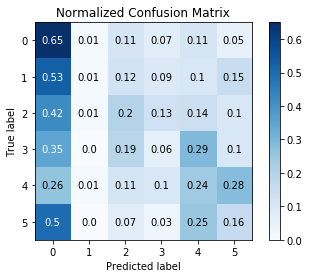

In [0]:
print('For Logistic Regression accuracy score is ',accuracy_score(Y_test,pred1))
print('For  Logistic Regression confusion_matrix is: \n\n',confusion_matrix(Y_test,pred1))
print ('For  Logistic Regression Classification Report: \n\n',classification_report(Y_test,pred1))
skplt.metrics.plot_confusion_matrix(Y_test, pred1, normalize=True)
plt.show()

In [0]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values = 'NaN', strategy = "most_frequent", axis = 0)
imp = imp.fit(X_train)
X_train_imp = imp.transform(X_train)
fit_random_forest = RandomForestClassifier(random_state = 42)
fit_random_forest.fit(X_train_imp, Y_train);
X_test_imp = imp.transform(X_test)
y_predicted = fit_random_forest.predict(X_test_imp)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


35.22 %
[[46  8  3  8  8  2]
 [16 29 16  9 11  8]
 [11 14 31 14 13 10]
 [ 7 11 19 45 16 10]
 [12 11 18 15 25 16]
 [22 16 13 10 19 23]]
              precision    recall  f1-score   support

           0       0.40      0.61      0.49        75
           1       0.33      0.33      0.33        89
           2       0.31      0.33      0.32        93
           3       0.45      0.42      0.43       108
           4       0.27      0.26      0.26        97
           5       0.33      0.22      0.27       103

    accuracy                           0.35       565
   macro avg       0.35      0.36      0.35       565
weighted avg       0.35      0.35      0.35       565



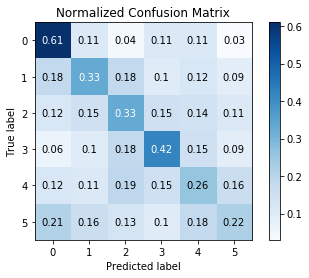

In [0]:
accuracy = accuracy_score(Y_test, y_predicted)*100
print(round(accuracy, 2), '%')
print(confusion_matrix(Y_test, y_predicted))
print (classification_report(Y_test,y_predicted))
skplt.metrics.plot_confusion_matrix(Y_test,y_predicted, normalize=True)
plt.show()

[[26  7 10  9 11 12]
 [11 31 13  8 12 14]
 [ 9 12 37 13 12 10]
 [ 8  9 12 36 18 25]
 [12  8 13 16 26 22]
 [15 13 16 19 19 21]]
              precision    recall  f1-score   support

           0       0.32      0.35      0.33        75
           1       0.39      0.35      0.37        89
           2       0.37      0.40      0.38        93
           3       0.36      0.33      0.34       108
           4       0.27      0.27      0.27        97
           5       0.20      0.20      0.20       103

    accuracy                           0.31       565
   macro avg       0.32      0.32      0.32       565
weighted avg       0.31      0.31      0.31       565



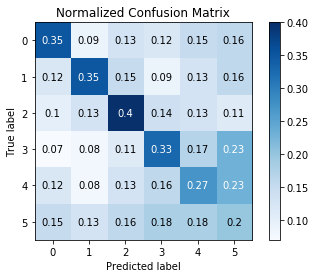

In [0]:
#kNN

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train_s, Y_train)
Y_pred = classifier.predict(X_test_s)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
plt.show()
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, normalize=True)
plt.show()


In [0]:
from sklearn.metrics import accuracy_score 
print(accuracy_score(Y_test, Y_pred)*100,'%')
#print (((cm[0][0]+cm[1][1])*100)/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]), '% of testing data was classified correctly')
print(classification_report(Y_test,Y_pred))

31.327433628318584 %
              precision    recall  f1-score   support

           0       0.32      0.35      0.33        75
           1       0.39      0.35      0.37        89
           2       0.37      0.40      0.38        93
           3       0.36      0.33      0.34       108
           4       0.27      0.27      0.27        97
           5       0.20      0.20      0.20       103

    accuracy                           0.31       565
   macro avg       0.32      0.32      0.32       565
weighted avg       0.31      0.31      0.31       565



Text(0, 0.5, 'Mean Error')

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

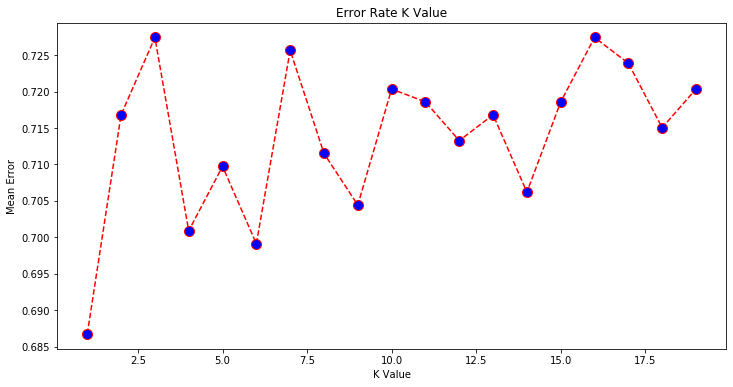

In [0]:
error = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_s, Y_train)
    pred_i = knn.predict(X_test_s)
    error.append(np.mean(pred_i != Y_test))
    plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [0]:
#SVM
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
import math 
import io
import scikitplot as skplt
#Libraries to Build Ensemble Model : Random Forest Classifier 
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train_s, Y_train)
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 
# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")
final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_s)
Y_pred_label = list(encoder.inverse_transform(Y_pred))


Best score for training data: 0.2627381479840496 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.001 



In [0]:
print("Training set score for SVM: %f" % final_model.score(X_train_s , Y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test_s  , Y_test ))

svm_model.score

Training set score for SVM: 0.281347
Testing  set score for SVM: 0.238938


<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)>

[[45  2 13  4  7  4]
 [34  2 18  5 17 13]
 [15  0 27 16 26  9]
 [24  2 25 10 36 11]
 [14  0 11 11 33 28]
 [30  1 11  7 36 18]]


              precision    recall  f1-score   support

           0       0.28      0.60      0.38        75
           1       0.29      0.02      0.04        89
           2       0.26      0.29      0.27        93
           3       0.19      0.09      0.12       108
           4       0.21      0.34      0.26        97
           5       0.22      0.17      0.19       103

    accuracy                           0.24       565
   macro avg       0.24      0.25      0.21       565
weighted avg       0.24      0.24      0.21       565

              precision    recall  f1-score   support

           0       0.28      0.60      0.38        75
           1       0.29      0.02      0.04        89
           2       0.26      0.29      0.27        93
           3       0.19      0.09      0.12       108
           4       0.21      0.34      0.26        97
   

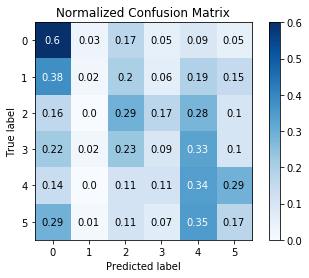

In [0]:
print(confusion_matrix(Y_test,Y_pred))
print("\n")
print(classification_report(Y_test,Y_pred))
print(classification_report(Y_test, Y_pred))
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, normalize=True)
plt.show()

In [0]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB() 
gnb.fit(X_train, Y_train) 
  
# making predictions on the testing set 
y_pred_nb = gnb.predict(X_test) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(Y_test, y_pred_nb)*100)

Gaussian Naive Bayes model accuracy(in %): 23.008849557522122


[[53  0  6  3  7  6]
 [46  0  7  6 16 14]
 [36  0  8 14 22 13]
 [41  0  9 11 35 12]
 [17  0  5  9 32 34]
 [37  0  3  5 32 26]]


              precision    recall  f1-score   support

           0       0.23      0.71      0.35        75
           1       0.00      0.00      0.00        89
           2       0.21      0.09      0.12        93
           3       0.23      0.10      0.14       108
           4       0.22      0.33      0.27        97
           5       0.25      0.25      0.25       103

    accuracy                           0.23       565
   macro avg       0.19      0.25      0.19       565
weighted avg       0.19      0.23      0.18       565

              precision    recall  f1-score   support

           0       0.23      0.71      0.35        75
           1       0.00      0.00      0.00        89
           2       0.21      0.09      0.12        93
           3       0.23      0.10      0.14       108
           4       0.22      0.33      0.27        97
   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


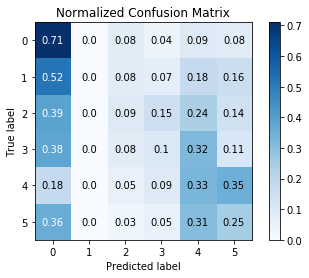

In [0]:
print(confusion_matrix(Y_test, y_pred_nb))
print("\n")
print(classification_report(Y_test, y_pred_nb))
print(classification_report(Y_test, y_pred_nb))
skplt.metrics.plot_confusion_matrix(Y_test, y_pred_nb, normalize=True)
plt.show()